## 6 - Displaying Formations on Log Plots
Created by: Andy McDonald

This short notebook illustrates how to add background shading to each of the curve tracks based on formations contained within a dictionary object.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
well = pd.read_csv("Data/15_9-19.csv", header=0, skiprows=[1])

In [3]:
well.replace(-999.00, np.nan, inplace=True)

In [4]:
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0.0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0.0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0.0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0.0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0.0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


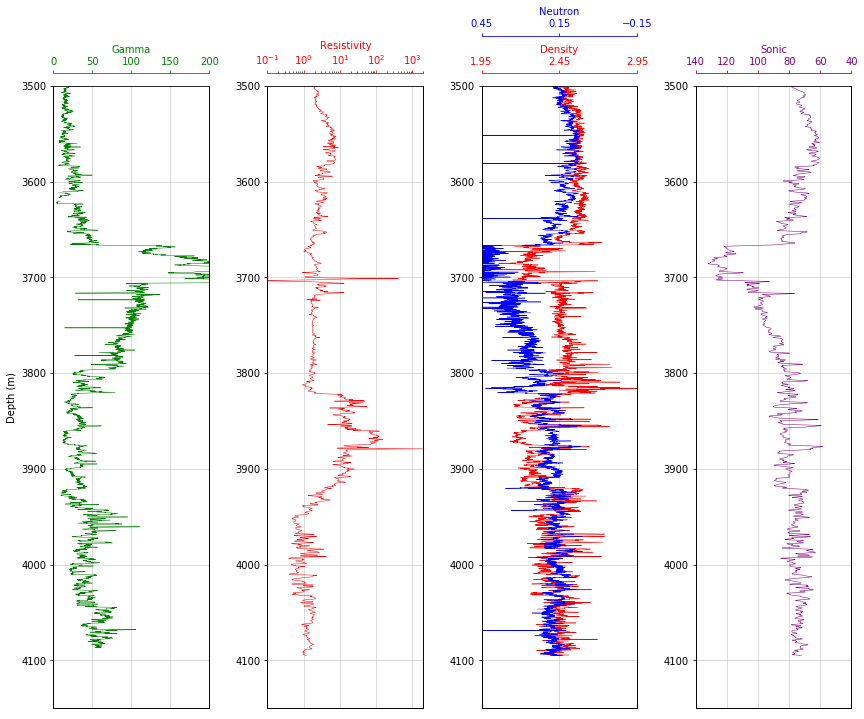

In [5]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(4150, 3500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

### Displaying shaded formation intervals on the plot

We can use the axhspan functions for shade across each track at specified depth intervals.
To tidy up the plot, we can remove the depth labels for each track. We require a short separation between the tracks due to overlap of the curve scales.

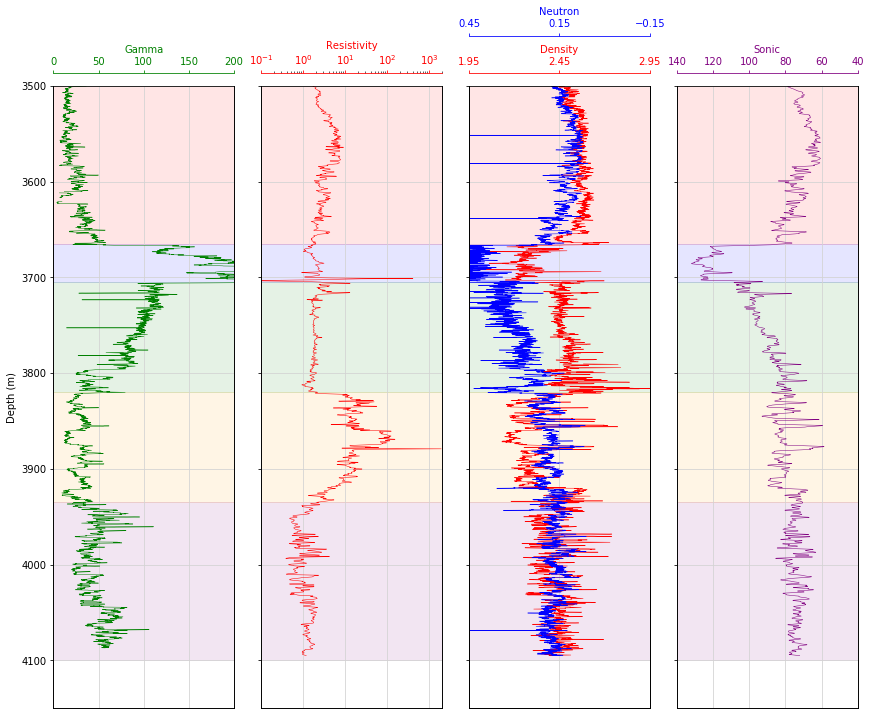

In [6]:
# Create a dictionary of formations with a top and bottom depth
formations = {"A":[3500, 3665], 
              "B": [3665, 3705],
              "C": [3705, 3820],
              "D": [3820, 3935],
              "E": [3935, 4100]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]

fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])


# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(4150, 3500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)